## Day 47 Lecture 1 Assignment

In this assignment, we will apply k-means clustering to a dataset containing player-season statistics for NBA players from the past four years.

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
def get_df(url):
  df = pd.read_csv(url)
  return df

This dataset contains player-season statistics for NBA players from the past four years. Each row in this dataset represents a player's per-game averages for a single season. 

This dataset contains the following variables:

- Seas: season ('2019' = 2018-2019 season, '2018' = 2017-2018 season, etc.)
- Player: player name
- Pos: position
- Age: age
- Tm: team
- G: games played
- GS: games started
- MP: minutes played
- FG: field goals
- FGA: field goals attempted
- FG%: field goal percentage
- 3P: 3 pointers
- 3PA: 3 pointers attempted
- 3P%: 3 point percentage
- 2P: 2 pointers
- 2PA: 2 pointers attempted
- 2P%: 2 point percentage
- eFG%: effective field goal percentage
- FT: free throws
- FTA: free throws attempted
- FT%: free throw percentage
- ORB: offensive rebound
- DRB: defensive rebound
- TRB: total rebounds
- AST: assists
- STL: steals
- BLK: blocks
- TOV: turnovers
- PF: personal fouls
- PTS: points

Load the dataset.

In [ ]:
# answer goes here
NBA_df = get_df('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/nba_player_seasons.csv')
NBA_df.head()


,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2019,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,1.3,4.1,0.323,0.5,1.0,0.500,0.487,0.4,0.4,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2019,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,0.2,1.5,0.133,0.2,0.3,0.667,0.278,0.7,1.0,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,2019,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,0.7,2.2,0.338,0.4,1.1,0.361,0.459,0.2,0.3,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,2019,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,6.0,10.1,0.596,0.595,1.8,3.7,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,2019,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,3.4,5.7,0.588,0.579,2.0,2.8,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


The goal is to cluster these player-seasons to identify potential player "archetypes".

Begin by removing players whose season did not meet one of the following criteria:
1. Started at least 20 games
2. Averaged at least 10 minutes per game

In [ ]:
gb = NBA_df.groupby(by='Player')['MP'].mean()
players =  gb[gb >= 10].index
players

Index(['Aaron Brooks', 'Aaron Gordon', 'Aaron Harrison', 'Aaron Holiday',
       'Aaron Jackson', 'Abdel Nader', 'Al Horford', 'Al Jefferson',
       'Al-Farouq Aminu', 'Alan Anderson',
       ...
       'Xavier Rathan-Mayes', 'Yogi Ferrell', 'Yuta Watanabe', 'Zach Collins',
       'Zach LaVine', 'Zach Randolph', 'Zaza Pachulia', 'Zhaire Smith',
       'Álex Abrines', 'Ömer Aşık'],
      dtype='object', name='Player', length=629)

In [ ]:
NBA = NBA_df[(NBA_df['Player'].isin(players)) & (NBA_df['GS'] >= 20)]
NBA.head()

,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3,2019,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,6.0,10.1,0.596,0.595,1.8,3.7,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,2019,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,3.4,5.7,0.588,0.579,2.0,2.8,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
7,2019,LaMarcus Aldridge,C,33,SAS,81,81,33.2,8.4,16.3,0.519,0.1,0.5,0.238,8.3,15.8,0.528,0.522,4.3,5.1,0.847,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3
10,2019,Jarrett Allen,C,20,BRK,80,80,26.2,4.2,7.1,0.590,0.1,0.6,0.133,4.1,6.5,0.629,0.595,2.5,3.5,0.709,2.4,6.0,8.4,1.4,0.5,1.5,1.3,2.3,10.9
12,2019,Al-Farouq Aminu,PF,28,POR,81,81,28.3,3.2,7.3,0.433,1.2,3.5,0.343,2.0,3.9,0.514,0.514,1.9,2.1,0.867,1.4,6.1,7.5,1.3,0.8,0.4,0.9,1.8,9.4


Choose a subset of numeric columns that is interesting to you from an "archetypal" standpoint. 

We will choose the following basic statistics: **points, total rebounds, assists, steals, blocks**, and **turnovers**, but you should feel free to choose other reasonable feature sets if you like. Be careful not to include too many dimensions (curse of dimensionality).

In [ ]:
# answer goes here
cols = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV']
NBA = NBA[cols]
NBA.head()

,PTS,TRB,AST,STL,BLK,TOV
3,13.9,9.5,1.6,1.5,1.0,1.7
4,8.9,7.3,2.2,0.9,0.8,1.5
7,21.3,9.2,2.4,0.5,1.3,1.8
10,10.9,8.4,1.4,0.5,1.5,1.3
12,9.4,7.5,1.3,0.8,0.4,0.9


Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [ ]:
# answer goes here
scale = StandardScaler()
X_std = scale.fit_transform(NBA)

Run K-means clustering with K = 3 and print out the resulting centroids. When printing the centroids, transform the scaled centroids back into their corresponding unscaled values. What "archetypes" do you see?

In [ ]:
# Defining the k-means
KNBA= KMeans(n_clusters=3)

# Fit model
KNBA.fit(X_std)
KNBA_df = pd.DataFrame(scale.inverse_transform(KNBA.cluster_centers_), columns=['points', 'total rebounds', 'assists', 'steals', 'blocks', 'turnovers'])
KNBA_df.style.background_gradient()

,points,total rebounds,assists,steals,blocks,turnovers
0,13.735359,8.605525,1.914917,0.777348,1.230387,1.668508
1,19.491620,5.293855,5.934078,1.354190,0.486034,2.797765
2,10.490787,3.945393,2.060000,0.803371,0.374607,1.233034


The three archetypes that I see are: 
*   "Defensive" team player
*   "Offensive" team player
*   "Point shooter"



Experiment with different values of K. Do any further interesting archetypes come out?

In [ ]:
# Defining the k-means
KNBA= KMeans(n_clusters=7)

# Fit model
KNBA.fit(X_std)
KNBA_df = pd.DataFrame(scale.inverse_transform(KNBA.cluster_centers_), columns=['points', 'total rebounds', 'assists', 'steals', 'blocks', 'turnovers'])
KNBA_df.style.background_gradient()

,points,total rebounds,assists,steals,blocks,turnovers
0,12.775325,3.172078,3.305195,0.891558,0.236364,1.617532
1,13.887407,6.343704,2.128148,1.062222,0.537037,1.545185
2,7.508840,3.514365,1.302762,0.610497,0.365746,0.865193
3,17.791667,10.530000,2.326667,0.930000,1.728333,2.135000
4,10.369643,6.940179,1.473214,0.604464,1.066964,1.290179
5,18.395276,4.613386,5.652756,1.318110,0.395276,2.562992
6,24.363889,7.913889,7.525000,1.625000,0.775000,3.863889


In [ ]:
# Defining the k-means
KNBA= KMeans(n_clusters=13)

# Fit model
KNBA.fit(X_std)
KNBA_df = pd.DataFrame(scale.inverse_transform(KNBA.cluster_centers_), columns=['points', 'total rebounds', 'assists', 'steals', 'blocks', 'turnovers'])
KNBA_df.style.background_gradient()

,points,total rebounds,assists,steals,blocks,turnovers
0,15.532759,8.801724,2.581034,0.777586,0.934483,1.877586
1,16.917073,4.107317,2.779268,0.847561,0.314634,1.821951
2,9.704167,6.794444,1.284722,0.533333,1.155556,1.269444
3,22.586957,4.602174,5.434783,1.047826,0.336957,2.745652
4,11.048515,5.818812,1.690099,0.833663,0.561386,1.205941
5,24.120000,7.455000,9.190000,1.645000,0.630000,4.185000
6,6.350909,3.413636,1.040909,0.497273,0.375455,0.751818
7,12.801786,3.916071,5.950000,1.162500,0.298214,2.391071
8,19.890476,5.219048,5.683333,1.780952,0.514286,2.580952
9,23.532000,10.560000,4.096000,1.248000,1.668000,3.036000


In [ ]:
# Defining the k-means
KNBA= KMeans(n_clusters=4)

# Fit model
KNBA.fit(X_std)
KNBA_df = pd.DataFrame(scale.inverse_transform(KNBA.cluster_centers_), columns=['points', 'total rebounds', 'assists', 'steals', 'blocks', 'turnovers'])
KNBA_df.style.background_gradient()

,points,total rebounds,assists,steals,blocks,turnovers
0,14.923529,9.114706,2.067647,0.772059,1.357353,1.816912
1,13.636614,4.196063,3.003937,1.034646,0.347638,1.637795
2,8.276753,4.260517,1.385978,0.629520,0.481550,0.971587
3,20.188889,5.561806,6.289583,1.404167,0.506944,2.952083


The offensive player really starts to shine while the point shooter starts to disappear at a four cluster, scoring fewer points overall without participating by recovering some of those shots, assisting or stealing. I even see that their block average tens to increase. 

Other than that, no. I mean, the offensive players seem to really start to shine and I can see by a fourth brea down that a nice runner up is a second offensive player. 

That defensive points total sees an increase. 

I think I might be able to weed out the "non-team-players" eventually. That's just an idea, though; right? These are the ones that are in the game most often and are most often starting. Sometimes it might be good to start humbly. 

The answer, of course, would depend on the team. 

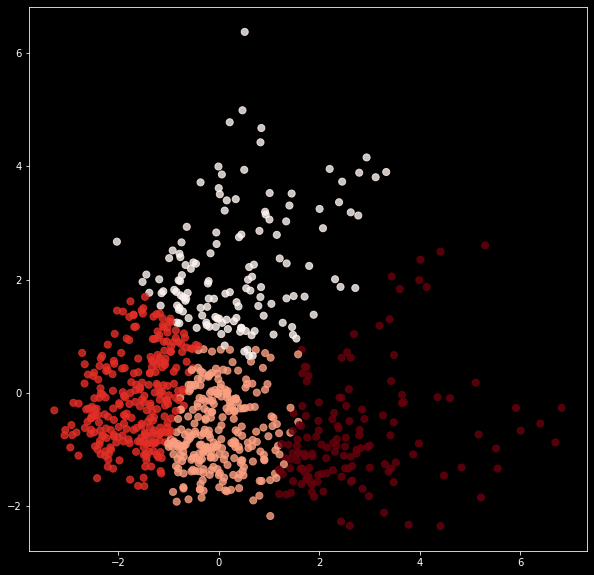

In [ ]:
from sklearn.decomposition import PCA
y_pred = KNBA.predict(X_std)


# Plot the solution.
plt.figure(figsize=(10,10))
plt.style.use(['dark_background'])
pca = PCA(n_components=2).fit_transform(X_std)
plt.scatter(pca[:,0], pca[:,1], c=y_pred, alpha=.8, cmap='Reds', s=50)
plt.show()

In [ ]:
#What's up with this?
if np.array_equal(y_pred, KNBA.labels_):
  print("hi!")

hi!
